In [1]:
import numpy as np
# Data
positions = np.load("car_position.npy")
reference = np.load("reference.npy")
time = np.load("time.npy")

In [2]:
def steady_state_error(positions, reference):
    positions[-int(len(positions) * 0.1):]
    steady_state_value = np.mean(positions[-int(len(positions) * 0.1):])  # Last 10% of data
    steady_state_error = reference - steady_state_value
    print(f"Steady-State Error: {steady_state_error}")
    
def overshoot(positions, reference):
    peak = np.max(positions)
    overshoot = (peak - reference) / reference * 100
    print(f"Overshoot: {overshoot}%")
    
def settling_time(time, positions, reference, tolerance = 0.02):
    lower_bound = reference * (1 - tolerance)
    upper_bound = reference * (1 + tolerance)
    within_bounds = (positions >= lower_bound) & (positions <= upper_bound)
    settling_time_idx = np.where(~within_bounds)[0]
    settling_time = time[settling_time_idx[-1]+1]
    print(f"Settling Time: {settling_time} seconds")
        
def rise_time(time, positions, reference):
    t_10 = time[np.where(positions >= 0.1 * reference)[0][0]]
    t_90 = time[np.where(positions >= 0.9 * reference)[0][0]]
    rise_time = t_90 - t_10
    print(f"Rise Time: {rise_time} seconds")

In [3]:
a = time < 4.0
time_ref1 = time[a]
positions_ref1 = positions[a]
reference_ref1 = reference[a][-1]

steady_state_error(positions_ref1, reference_ref1)
overshoot(positions_ref1, reference_ref1)
settling_time(time_ref1, positions_ref1, reference_ref1)
rise_time(time_ref1, positions_ref1, reference_ref1)

Steady-State Error: -7.898754539326092e-09
Overshoot: 0.7338833567961833
Settling Time: 0.6 seconds
Rise Time: 0.39999999999999997 seconds


In [4]:
a = (time > 4.0) & (time < 8.0)
time_ref2 = time[a]
time_ref2 = time_ref2 - time_ref2[0]
reference_ref2 = reference[a][-1]
positions_ref2 = positions[a]

steady_state_error(positions_ref2, reference_ref2)
overshoot(positions_ref2, reference_ref2)
settling_time(time_ref2, positions_ref2, reference_ref2)
rise_time(time_ref2, positions_ref2, reference_ref2)

Steady-State Error: 2.1195865174128414e-08
Overshoot: 399.99999988705474
Settling Time: 1.1999999999999957 seconds
Rise Time: 0.0 seconds


In [5]:
a = time > 8.0
time_ref3 = time[a]
time_ref3 = time_ref3 - time_ref3[0]
reference_ref3 = reference[a][-1]
positions_ref3 = positions[a]

steady_state_error(positions_ref3, reference_ref3)
overshoot(positions_ref3, reference_ref3)
settling_time(time_ref3, positions_ref3, reference_ref3)
rise_time(time_ref3, positions_ref3, reference_ref3)

Steady-State Error: -5.489839249861461e-09
Overshoot: 2.0946486881042725
Settling Time: 0.7500000000000107 seconds
Rise Time: 0.4000000000000057 seconds


Steady-State Error: 2.6492141813605485e-12
Overshoot: 0.00014032600597069234
Settling Time: 0.9000000000000002 seconds
Rise Time: 0.5499999999999999 seconds
Steady-State Error: -8.881784197001252e-16
Overshoot: 0.0012477463477322814
Settling Time: 0.65 seconds
Rise Time: 0.39999999999999997 seconds
Steady-State Error: 0.0
Overshoot: 0.00744855909626807
Settling Time: 0.49999999999999994 seconds
Rise Time: 0.3 seconds
Steady-State Error: 4.440892098500626e-16
Overshoot: 0.030954796991378153
Settling Time: 0.39999999999999997 seconds
Rise Time: 0.25 seconds


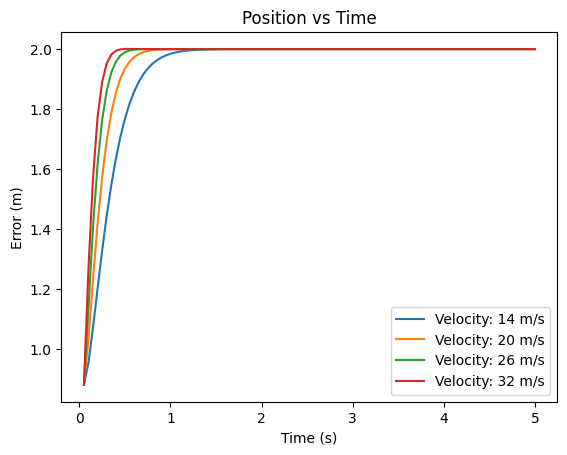

In [6]:
import numpy as np
import matplotlib.pyplot as plt
MIN_VEL = 14
MAX_VEL = 32
# OPen the files in a Task5_results folder. Use Regex to extract the data. All have the same format, but depend on the velocity.
# Example: For 14m/s we have, Task5_results\car_position_14.npy and Task5_results\reference_14.npy 
time = np.load(f"Task5_results/time.npy")
time = time - time[0]
time = time[1:]
reference = 2
for vel in range(MIN_VEL, MAX_VEL + 1, 6):
    positions = np.load(f"Task5_results/car_position_{vel}.npy")
    steady_state_error(positions, reference)
    overshoot(positions, reference)
    settling_time(time, positions, reference)
    rise_time(time, positions, reference)
    plt.plot(time, positions[1:], label=f"Velocity: {vel} m/s")
plt.title("Position vs Time")
plt.xlabel("Time (s)")
plt.ylabel("Error (m)")
plt.legend()
plt.show()
